# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [4]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

#Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [72]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type 

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [73]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type 

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [74]:
#  3. Get the total amount of fares for each city type
total_fare_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [75]:
#  4. Get the average fare per ride for each city type. 
avg_fare_by_type = total_fare_by_type /total_rides_by_type 
avg_fare_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [76]:
# 5. Get the average fare per driver for each city type. 
avg_driver_by_type = total_fare_by_type /total_drivers_by_type
avg_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [77]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame()

pyber_summary_df["Total Rides"] = total_rides_by_type 
pyber_summary_df["Total Drivers"] = total_drivers_by_type 
pyber_summary_df["Total Fares"] = total_fare_by_type
pyber_summary_df["Average Fare per Ride"] = avg_fare_by_type
pyber_summary_df["Average Fare per Driver"] = avg_driver_by_type

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [78]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [86]:
#  8. Format the columns.
pyber_summary_df = pd.DataFrame()

pyber_summary_df["Total Rides"] = total_rides_by_type.map('{:,}'.format)
pyber_summary_df["Total Drivers"] = total_drivers_by_type.map('{:,}'.format)
pyber_summary_df["Total Fares"] = total_fare_by_type.map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Ride"] = avg_fare_by_type.map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Driver"] = avg_driver_by_type.map('${:,.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [112]:
# 1. Read the merged DataFrame
pyber_data_df

,level_0,index,city,date,fare,ride_id,driver_count,type
0,0,0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,1,1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,2,2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,3,3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,4,4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...,...,...
2370,2370,2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,2371,2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,2372,2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,2373,2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [113]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pivot_pyber_data_df = pyber_data_df.groupby(['date', 'type']).sum()['fare']
pivot_pyber_data_df.head(10)

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
2019-01-01 09:45:36  Rural       43.69
2019-01-01 12:32:48  Suburban    25.56
2019-01-01 14:40:14  Urban        5.42
2019-01-01 14:42:25  Urban       12.31
2019-01-01 14:52:06  Suburban    31.15
Name: fare, dtype: float64

In [114]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pivot_pyber_data_df = new_pyber_data_df.reset_index()
pivot_pyber_data_df

,index,date,type,fare
0,0,2019-01-01 00:08:16,Urban,37.91
1,1,2019-01-01 00:46:46,Suburban,47.74
2,2,2019-01-01 02:07:24,Suburban,24.07
3,3,2019-01-01 03:46:50,Urban,7.57
4,4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...,...
2370,2370,2019-05-08 04:20:00,Urban,21.99
2371,2371,2019-05-08 04:39:49,Urban,18.45
2372,2372,2019-05-08 07:29:01,Urban,18.55
2373,2373,2019-05-08 11:38:35,Urban,19.77


In [116]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_pyber_data_df=pivot_pyber_data_df.pivot(index='date', columns ='type', values='fare')
pivot_pyber_data_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [118]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
Jan_April_pyber_data_df = pivot_pyber_data_df.loc['2019-01-01':'2019-04-29']
Jan_April_pyber_data_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [119]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
Jan_April_pyber_data_df.index = pd.to_datetime(Jan_April_pyber_data_df.index)

In [121]:
# 7. Check that the datatype for the index is datetime using df.info()
Jan_April_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [123]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_pyber_week_fares= Jan_April_pyber_data_df.resample("W").sum()
sum_pyber_week_fares

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


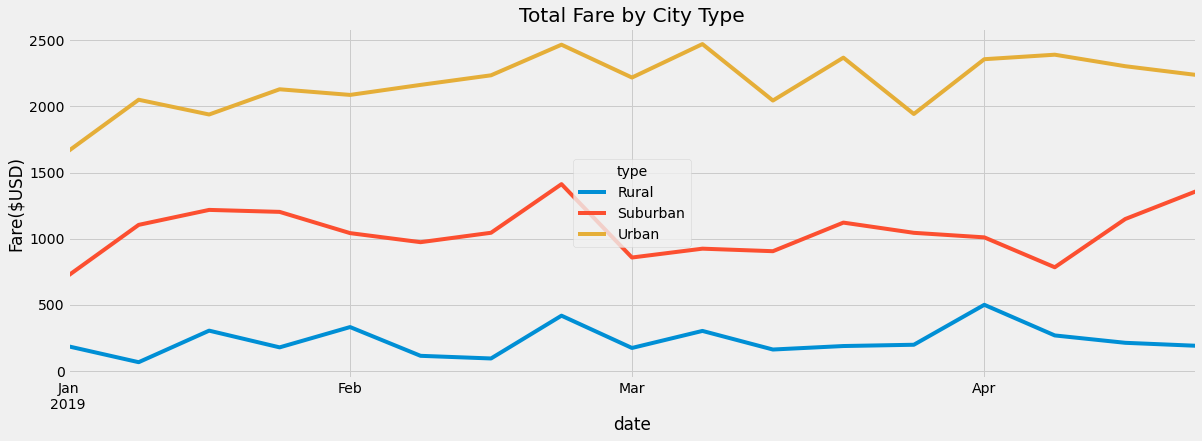

In [136]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

sum_pyber_week_fares.plot(figsize=(18, 6))

# Create labels for the x and y axes.
plt.ylabel("Fare($USD)")
# Create a title.
plt.title("Total Fare by City Type")

# Save the figure.
plt.savefig("analysis/Fig8.png")
